In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


# **Pre-processing**

In [ ]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# Normalizing
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [ ]:
# One-Hot Encoding of Labels
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)

# **Creating CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(strides=(2,2), pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # as there are 10 output classes

# **Training the Model**

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 53s 105ms/step - loss: 0.2113 - accuracy: 0.9389 - val_loss: 0.0733 - val_accuracy: 0.9778
Epoch 2/5
469/469 [==============================] - 27s 58ms/step - loss: 0.0632 - accuracy: 0.9812 - val_loss: 0.0525 - val_accuracy: 0.9828
Epoch 3/5
469/469 [==============================] - 29s 61ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0439 - val_accuracy: 0.9846
Epoch 4/5
469/469 [==============================] - 26s 56ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 5/5
469/469 [==============================] - 27s 58ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0418 - val_accuracy: 0.9872


# **Evaluating Results of Test Data**

In [ ]:
# Validation loss & accuracy
loss, acc = model.evaluate(X_test, y_test, verbose = 0)

In [ ]:
print("Loss:", loss)
print("Accuracy", acc)

Loss: 0.04182492196559906
Accuracy 0.9872000217437744


In [ ]:
# Predicting class of test data
y_pred = np.round(model.predict(X_test, verbose="auto"))

313/313 [==============================] - 2s 6ms/step


In [ ]:
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Converting one-hot encoding back to categorical
y_test_pred = np.argmax(y_pred, axis=1)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6])

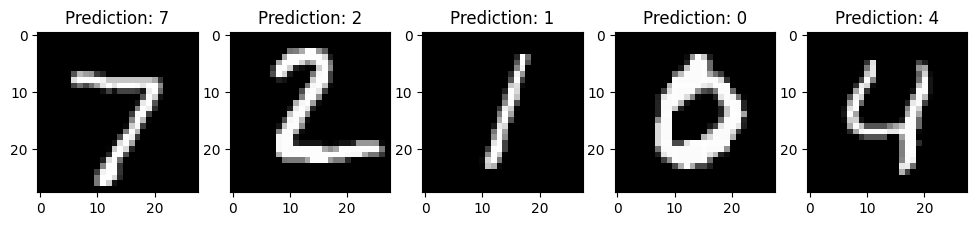

In [ ]:
f, ax = plt.subplots(1,5,figsize=(12,12))

for i in range(5):
  ax[i].imshow(X_test[i], cmap='gray')
  ax[i].set_title('Prediction: {}'.format(y_test_pred[i]))

In [ ]:
# Classification report of test data
print(classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

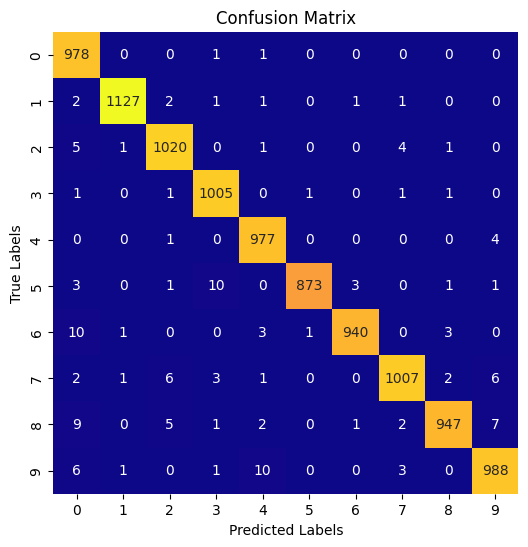

In [ ]:
cm = confusion_matrix(Y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

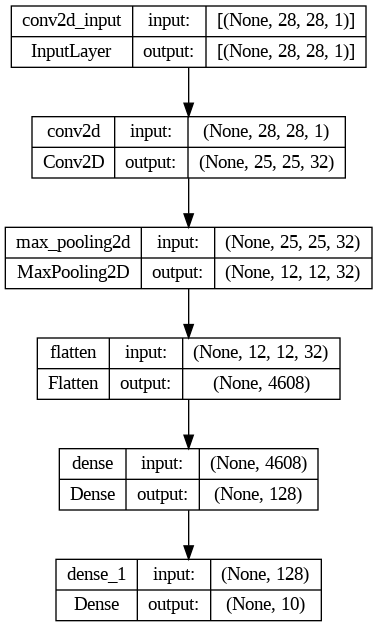

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
9# Checking parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________